# Overview

We provide insights about a company's sales and marketing practices. We focus on the use of influencer marketing.

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('C:/Users/0&1/OneDrive/Documents/marketing_sales_data.csv')

In [3]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774791
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


# Model building

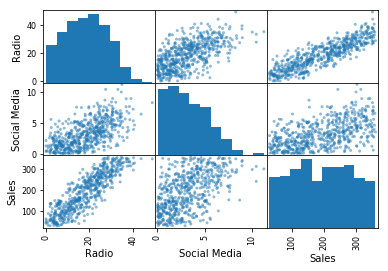

In [4]:
# Create a pairplot of the data.
pd.plotting.scatter_matrix(data);
plt.show()

Radio and Social Media both appear to have linear relationships with Sales. Given this, Radio and Social Media may be useful as independent variables in a multiple linear regression model estimating Sales.

TV and Influencer are excluded from the pairplot because they are not numeric.

There are two categorical variables: TV and Influencer.

To characterize the relationship between the categorical variables and Sales, we find the mean Sales for each category in TV and the mean Sales for each category in Influencer.

In [5]:
# Calculate the mean sales for each TV category. 
print(data.groupby('TV')['Sales'].mean())
print('')

# Calculate the mean sales for each Influencer category.
print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


- The average Sales for High TV promotions is considerably higher than for Medium and Low TV promotions. TV may be a strong predictor of Sales.

- The categories for Influencer have different average Sales, but the variation is not substantial. Influencer may be a weak predictor of Sales.

In [6]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)

In [7]:
# Rename all columns in data that contain a space. 
data = data.rename(columns={'Social Media': 'Social_Media'})

In [8]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV) + Radio'
# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)
# Fit the model.
model = OLS.fit()
# Save the results summary.
model_results = model.summary()
# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.61e-287
Time:                        10:54:20   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- TV was selected, as the preceding analysis showed a strong relationship between the TV promotional budget and the average Sales.
- Radio was selected because the pairplot showed a strong linear relationship between Radio and Sales.
- Social Media was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: Radio.
- Influencer was not selected because it did not show a strong relationship to Sales in the preceding analysis.

# Linearity

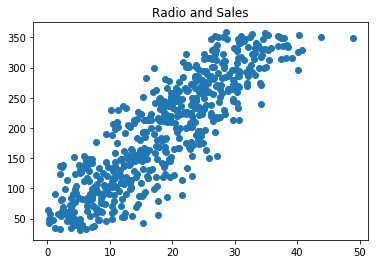

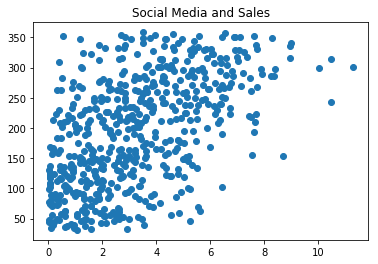

In [19]:
# Create a scatterplot for each independent variable and the dependent variable.


# Create a scatterplot between Radio and Sales.
plt.scatter(x = data['Radio'], y = data['Sales'])
# Set the title of the first plot.
plt.title("Radio and Sales")
plt.show()
# Create a scatterplot between Social Media and Sales.
plt.scatter(x = data['Social_Media'], y = data['Sales'])
# Set the title of the second plot.
plt.title("Social Media and Sales")
plt.show()



The linearity assumption holds for Radio, as there is a clear linear relationship in the scatterplot between Radio and Sales. Social Media was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with Sales.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

# Normality

- Plot 1: Histogram of the residuals
- Plot 2: Q-Q plot of the residuals

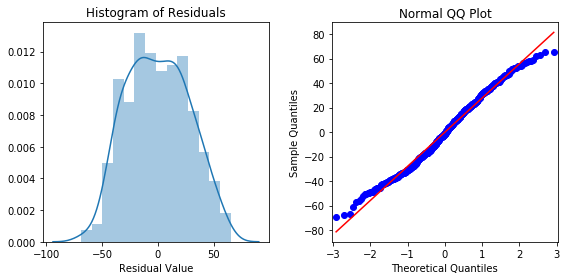

In [22]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 
sns.distplot(residuals, ax=axes[0])
# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")
# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

# Constant variance

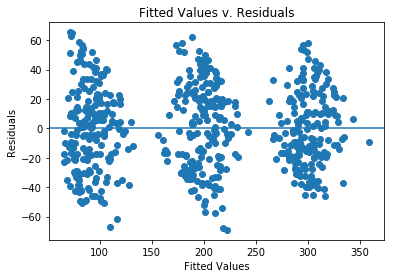

In [25]:
# Create a scatterplot with the fitted values from the model and the residuals.
plt.scatter(x = model.fittedvalues, y = model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values v. Residuals")
plt.axhline(0)
plt.show()

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

# No multicollinearity

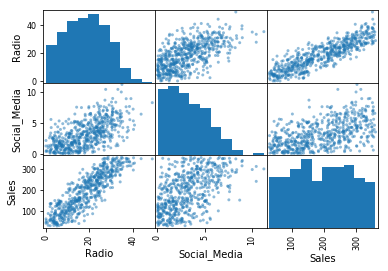

In [27]:
pd.plotting.scatter_matrix(data);
plt.show()

In [28]:
# Calculate the variance inflation factor
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]
# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
# Display the VIF results.
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.

If a model used both Radio and Social_Media as predictors, there would be a moderate linear relationship between Radio and Social_Media that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both Radio and Social_Media are included in the model is 5.17 for each variable, indicating high multicollinearity.

# Results and evaluation

In [29]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.61e-287
Time:                        10:54:20   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Using TV and Radio as the independent variables results in a multiple linear regression model with  𝑅2=0.904
 . In other words, the model explains  90.4%
  of the variation in Sales. This makes the model an excellent predictor of Sales.

- When TV and Radio are used to predict Sales, the model coefficients are:

𝛽0=218.5261
 
𝛽𝑇𝑉𝐿𝑜𝑤=−154.2971
 
𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚=−75.3120
 
𝛽𝑅𝑎𝑑𝑖𝑜=2.9669


sales= 𝛽0 + 𝛽1* X1 + 𝛽2* X2 + 𝛽3* X3

sales= 𝛽0 + 𝛽Tvlow* Xtvlow + 𝛽tvmedium* Xtvmedium + 𝛽radio* Xradio

sales= 218.5261 - 154.2971 * Xtvlow - 75.3120 * Xtvmedium + 2.9669 * Xradio

The default TV category for the model is High since there are coefficients for the other two TV categories, Medium and Low. Because the coefficients for the Medium and Low TV categories are negative, that means the average of sales is lower for Medium or Low TV categories compared to the High TV category when Radio is at the same level.

For example, the model predicts that a Low TV promotion is 154.2971 lower on average compared to a high TV promotion given the same Radio promotion.

The coefficient for Radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000
 , meaning all coefficients are statistically significant at  𝑝=0.05
 . The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a  95%
  chance that the interval  [−163.979,−144.616]
  contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤
 , which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

- All in all:
    High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by  $75.3120
  million (95% CI  [−82.431,−68.193])
 , and switching from a high to low TV promotional budget reduces sales by  $154.297
  million (95% CI  [−163.979,−144.616])
 . The model also estimates that an increase of  $1
  million in the radio promotional budget will yield a  $2.9669
  million increase in sales (95% CI  [2.551,3.383]
 ).